In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [2]:
from sys import version_info
if version_info.major != 3:
    raise Exception('请使用Python 3 来完成此项目')

### <font color=LightCoral><center>一、数据整理</center></font>
#### <font color=LightCoral>1、查看用户基本信息表</font> 
<hr>  
  
  
<font color=LightCoral>性别：0，1，2（0代表未知）

In [3]:
user_info_train = pd.read_csv('train/user_info_train.txt',header=None,names=['用户id','性别','职业','教育程度','婚姻状态','户口类型'])
user_info_train.head(n=2)

,用户id,性别,职业,教育程度,婚姻状态,户口类型
0,3150,1,2,4,1,4
1,6965,1,2,4,3,2


<font color=LightCoral>

count：指定字段的非空总数。  
unique：该字段中保存的值类型数量，比如性别列保存了男、女两种值，则unique值则为2。  
top：数量最多的值。  
freq：数量最多的值的总数。
</font>

In [4]:
user_info_train.astype('object').describe()

,用户id,性别,职业,教育程度,婚姻状态,户口类型
count,55596,55596,55596,55596,55596,55596
unique,55596,3,5,5,6,5
top,55596,1,2,3,1,1
freq,1,44254,41150,23530,25098,17105


#### <font color=LightCoral>2、查看用户银行流水记录表<hr>
 <font color=LightCoral>时间：0表示时间未知(银行流水记录中时间缺失最多)  
交易类型：1支出，0收入  
工资收入：1收入</font>

In [5]:
bank_detail_train = pd.read_csv('train/bank_detail_train.txt',header=None,names=['用户id','交易时间','交易类型','交易金额','工资收入标记'])
bank_detail_train.head(2)

,用户id,交易时间,交易类型,交易金额,工资收入标记
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0


In [6]:
bank_detail_train.astype('object').describe()

,用户id,交易时间,交易类型,交易金额,工资收入标记
count,6070197,6070197,6070197,6.070197e+06,6070197
unique,9294,1419542,2,2.111080e+05,2
top,36347,0,1,1.145409e+01,0
freq,10515,38773,4353193,4.713770e+05,6033227


#### <font color=LightCoral>3、查看用户信用卡账单记录表<hr>
 <font color=LightCoral>时间：0表示时间未知(缺失最多)  
</font>

In [7]:
bill_detail_train = pd.read_csv('train/bill_detail_train.txt',header=None,names=['用户id','时间','银行标识','上期账单金额','上期还款金额','信用卡额度','本期账单余额','本期账单最低还款额','消费笔数','本期账单金额','调整金额','循环利息','可用余额','预借现金额度','还款状态'])
bill_detail_train.head(n=2)

,用户id,时间,银行标识,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用余额,预借现金额度,还款状态
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0


In [8]:
bill_detail_train.astype('object').describe()

,用户id,时间,银行标识,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用余额,预借现金额度,还款状态
count,2338118,2338118,2338118,2338118.0,2338118.0,2338118.0,2338118.0,2338118.0,2338118,2338118.0,2338118.0,2338118.0,2338118.0,2338118.0,2338118
unique,53174,518491,29,746645.0,217659.0,1235.0,908328.0,427822.0,78,541251.0,20032.0,48307.0,58228.0,1289.0,2
top,29631,0,7,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0
freq,7544,427447,397436,567190.0,638023.0,435015.0,48482.0,103549.0,1502993,756113.0,2289959.0,2037340.0,2245871.0,1139042.0,2337845


#### <font color=LightCoral>4、查看用户放款记录表

In [9]:
loan_time_train = pd.read_csv('train/loan_time_train.txt',header=None,names=['用户id','放款时间'])
loan_time_train.head(2)

,用户id,放款时间
0,1,5914855887
1,2,5914855887


In [10]:
loan_time_train.astype('object').describe()

,用户id,放款时间
count,55596,55596
unique,55596,191
top,55596,5927556687
freq,1,1256


#### <font color=LightCoral>5、查看用户逾期信息表</font> 

In [11]:
overdue_train = pd.read_csv('train/overdue_train.txt',header = None ,names =['用户id','是否逾期'])
overdue_train.head(2)

,用户id,是否逾期
0,1,0
1,2,0


In [12]:
overdue_train.astype('object').describe()
#overdue_train.info()

,用户id,是否逾期
count,55596,55596
unique,55596,2
top,55596,0
freq,1,48413


### <center><font color=LightCoral>二、将数据表根据“用户id”进行拼接</font></center> <hr>

In [14]:
print('user_info_train:',user_info_train.shape[0],'\n'
      ,'bank_detail_train:',bank_detail_train.shape[0],'\n'
      'bill_detail_train:',bill_detail_train.shape[0],'\n',
      'loan_time_train:',loan_time_train.shape[0],'\n'
      ,'overdue_train:',overdue_train.shape[0],'\n')

user_info_train: 55596 
 bank_detail_train: 6070197 
bill_detail_train: 2338118 
 loan_time_train: 55596 
 overdue_train: 55596 



In [15]:
#用户信息-逾期
info_overdue=pd.merge(user_info_train,overdue_train,on='用户id',how = 'left')
#info_overdue.head(2)
print(info_overdue.head(2),'\n',info_overdue.shape[0])

   用户id  性别  职业  教育程度  婚姻状态  户口类型  是否逾期
0  3150   1   2     4     1     4     0
1  6965   1   2     4     3     2     0 
 55596


In [16]:
#用户信息-放款时间-逾期
info_load_overdue=pd.merge(info_overdue,loan_time_train,on='用户id',how = 'left')
print(info_load_overdue.head(2),'\n',info_load_overdue.shape[0])

   用户id  性别  职业  教育程度  婚姻状态  户口类型  是否逾期        放款时间
0  3150   1   2     4     1     4     0  5919867087
1  6965   1   2     4     3     2     0  5923841487 
 55596


In [17]:
#用户信息-放款时间-银行-逾期
info_load_bank_overdue=pd.merge(info_load_overdue,bank_detail_train,on='用户id',how = 'inner')
info_load_bank_overdue.head(2)
print(info_load_bank_overdue.head(2),'\n',info_load_bank_overdue.shape[0])

   用户id  性别  职业  教育程度  婚姻状态  户口类型  是否逾期        放款时间        交易时间  交易类型  \
0  6965   1   2     4     3     2     0  5923841487  5894316387     0   
1  6965   1   2     4     3     2     0  5923841487  5894321388     1   

        交易金额  工资收入标记  
0  13.756664       0  
1  13.756664       0   
 6070197


In [ ]:
#用户信息-放款时间-银行-信用卡账单-逾期
info_load_bank_bill_overdue = pd.merge(info_load_bank_overdue,bill_detail_train,how='inner',on = '用户id')
print(info_load_bank_bill_overdue.head(2),'\n',info_load_bank_bill_overdue.shape[0])

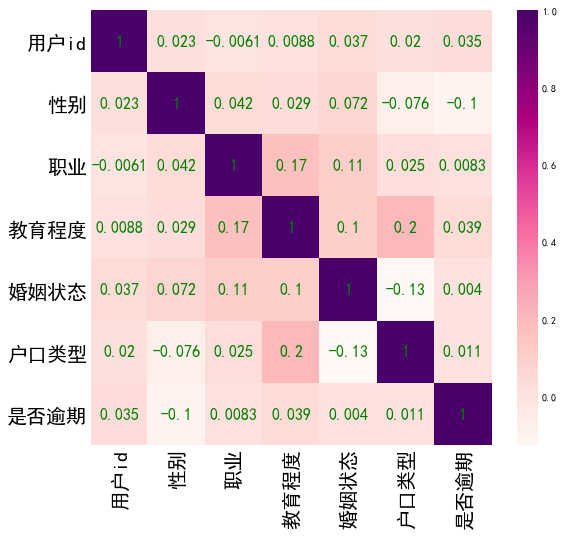

In [27]:
corr = info_overdue.corr()#计算各变量的相关性系数
xticks =list(corr.index)
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(8,8))#figsize=(14,12)使热力图变大
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='RdPu' ,ax=ax1, annot_kws={'size': 16, 'weight': 'light','color': 'green'})
ax1.set_xticklabels(xticks, rotation=90, fontsize=20)
ax1.set_yticklabels(yticks, rotation=0, fontsize=20)
plt.rcParams['font.sans-serif']=['SimHei']     #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False      #用来正常显示负号
plt.show()

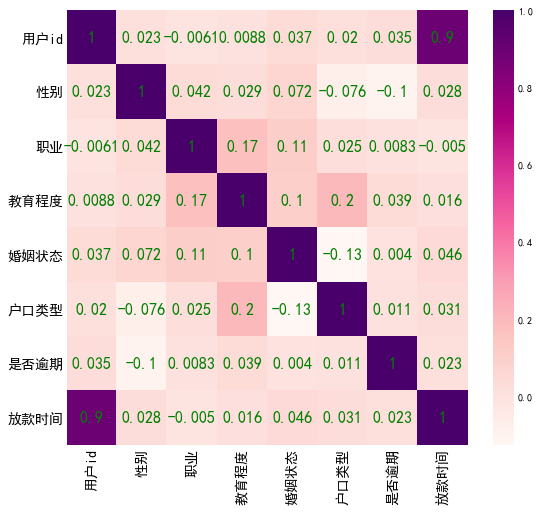

In [29]:
corr = info_load_overdue.corr()#计算各变量的相关性系数
xticks =list(corr.index)
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(8,8))#figsize=(14,12)使热力图变大
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='RdPu' ,ax=ax1, annot_kws={'size': 16, 'weight': 'light','color': 'green'})
ax1.set_xticklabels(xticks, rotation=90, fontsize=14)
ax1.set_yticklabels(yticks, rotation=0, fontsize=14)
plt.rcParams['font.sans-serif']=['SimHei']     #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False      #用来正常显示负号
plt.show()

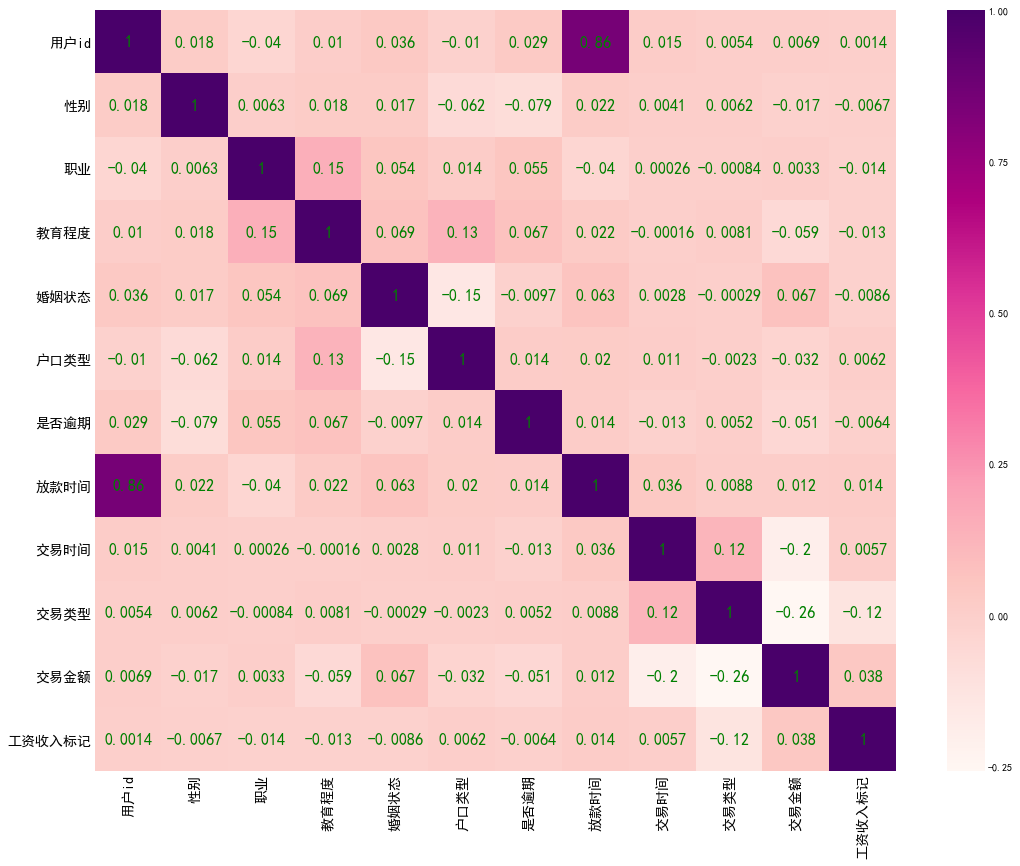

In [31]:
corr = info_load_bank_overdue.corr()#计算各变量的相关性系数
xticks =list(corr.index)
yticks = list(corr.index)#y轴标签
fig = plt.figure(figsize=(16,14))#figsize=(14,12)使热力图变大
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap='RdPu' ,ax=ax1, annot_kws={'size': 16, 'weight': 'light','color': 'green'})
ax1.set_xticklabels(xticks, rotation=90, fontsize=14)
ax1.set_yticklabels(yticks, rotation=0, fontsize=14)
plt.rcParams['font.sans-serif']=['SimHei']     #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False      #用来正常显示负号
plt.show()

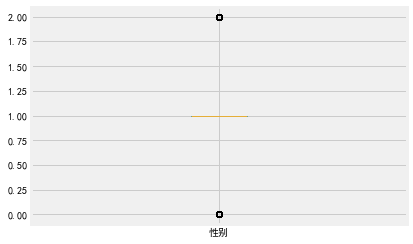

In [23]:
info_overdue.loc[:,['性别']].boxplot() #也可用plot.box()
plt.show()